# Introduction to dataframes using pandas
*pandas* is a library that allows the use of tabular data in Python. It can be used to parse excel files, .csv files, even .txt files into *dataframes*, a special data type used by pandas. A dataframe is a two-dimensional tabular data format, very similar to SQL tables. Dataframes are tightly intergrated with most data science or machine learning tools in Python.

This document is a whirlwind tour of pandas. For more info, check out the [official documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write).

## 1. Importing data

In [1]:
import pandas as pd # Libraries in Python must be pre-installed and imported before use. By convention, pandas is imported with the name 'pd'

In [2]:
url = 'https://raw.githubusercontent.com/EIncze/PythonTutorial/main/Data/export.csv'
data = pd.read_csv(url)

# Source: https://statswales.gov.wales/Catalogue/Health-and-Social-Care/NHS-Hospital-Activity/Referrals/referrals-by-localhealthboard-month
# This dataset presents a view of the number of referrals by LHB and month

Jupyter Notebook displays pandas dataframes really well:

In [3]:
data

,Unnamed: 0,Unnamed: 1,Jan-2020,Feb-2020,Mar-2020,Apr-2020,May-2020,Jun-2020,Jul-2020 (3),Aug-2020 (1),...,Nov-2020,Dec-2020,Jan-2021,Feb-2021 (4),Mar-2021,Apr-2021,May-2021,Jun-2021,Jul-2021,Aug-2021
0,All Wales LHB (Provider),NaN,118187,109369,85319,39027,48394,67560,83952,77532,...,88099,79743,76094,83284,107345,103619,103367,113851,109528,97729
1,All Wales LHB (Provider),Betsi Cadwaladr University Local Health Board,23407,21976,17207,8347,10120,13927,16421,14984,...,17953,17204,15618,16945,21019,20316,20791,22375,21175,18935
2,NaN,Powys Teaching Local Health Board,2085,1821,1450,544,662,916,1163,1186,...,1403,1243,1262,1451,1775,1720,1739,1946,1743,1606
3,NaN,Hywel Dda University Local Health Board (1),14377,13528,10635,4519,5640,8088,9949,9528,...,10816,9222,8653,9359,12288,12024,12174,13487,13004,11742
4,NaN,Swansea Bay University Health Board (2),18000,16552,12943,4969,6346,9423,12197,11592,...,13142,11521,11425,13271,16975,16006,15846,17620,17232,15521
5,NaN,Abertawe Bro Morgannwg University Local Health...,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6,NaN,Cwm Taf Morgannwg University Health Board (2),16224,14787,10993,5662,6877,9446,12273,10666,...,11973,10376,10146,11227,14369,14820,15171,16348,15697,13696
7,NaN,Cwm Taf University Local Health Board (2),.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
8,NaN,Aneurin Bevan University Local Health Board,24997,23069,18427,8701,10687,14640,18364,16757,...,18473,17259,16642,17952,23688,22354,21862,24455,23473,20853
9,NaN,Cardiff & Vale University Local Health Board,19097,17636,13664,6285,8062,11120,13585,12819,...,14339,12918,12348,13079,17231,16379,15784,17620,17204,15376


There are quite a few immediately apparent issues with this dataset. 
1. Notice that the first two columns did not get parsed perfectly. This is due to the way that the csv file was formatted by StatsWales and is easily fixed using pandas. 
2. Some values have numbers in parantheses. This is because the original data had tooltips for those values. This is not a huge problem.
3. The first column looks like it could be dropped without losing any information. 
4. There are also two rows that seem to be filled with blanks. (5 & 7)

## 2. Data manipulation

Let's first drop the first column. Either the name of a column or its position in this list can be used to drop it.

Column names can be accessed through the `.columns` attribute

In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Jan-2020 ', 'Feb-2020 ', 'Mar-2020 ',
       'Apr-2020 ', 'May-2020 ', 'Jun-2020 ', 'Jul-2020 (3)', 'Aug-2020 (1)',
       'Sep-2020 ', 'Oct-2020 ', 'Nov-2020 ', 'Dec-2020 ', 'Jan-2021 ',
       'Feb-2021 (4)', 'Mar-2021 ', 'Apr-2021 ', 'May-2021 ', 'Jun-2021 ',
       'Jul-2021 ', 'Aug-2021 '],
      dtype='object')

In [5]:
data.drop(columns='Unnamed: 0', inplace=True) # The 'inplace' parameter means that this function modifies the actual dataframe, by default it returns a new dataframe

In [6]:
data

,Unnamed: 1,Jan-2020,Feb-2020,Mar-2020,Apr-2020,May-2020,Jun-2020,Jul-2020 (3),Aug-2020 (1),Sep-2020,...,Nov-2020,Dec-2020,Jan-2021,Feb-2021 (4),Mar-2021,Apr-2021,May-2021,Jun-2021,Jul-2021,Aug-2021
0,NaN,118187,109369,85319,39027,48394,67560,83952,77532,90916,...,88099,79743,76094,83284,107345,103619,103367,113851,109528,97729
1,Betsi Cadwaladr University Local Health Board,23407,21976,17207,8347,10120,13927,16421,14984,18059,...,17953,17204,15618,16945,21019,20316,20791,22375,21175,18935
2,Powys Teaching Local Health Board,2085,1821,1450,544,662,916,1163,1186,1398,...,1403,1243,1262,1451,1775,1720,1739,1946,1743,1606
3,Hywel Dda University Local Health Board (1),14377,13528,10635,4519,5640,8088,9949,9528,11310,...,10816,9222,8653,9359,12288,12024,12174,13487,13004,11742
4,Swansea Bay University Health Board (2),18000,16552,12943,4969,6346,9423,12197,11592,14137,...,13142,11521,11425,13271,16975,16006,15846,17620,17232,15521
5,Abertawe Bro Morgannwg University Local Health...,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6,Cwm Taf Morgannwg University Health Board (2),16224,14787,10993,5662,6877,9446,12273,10666,12171,...,11973,10376,10146,11227,14369,14820,15171,16348,15697,13696
7,Cwm Taf University Local Health Board (2),.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
8,Aneurin Bevan University Local Health Board,24997,23069,18427,8701,10687,14640,18364,16757,19174,...,18473,17259,16642,17952,23688,22354,21862,24455,23473,20853
9,Cardiff & Vale University Local Health Board,19097,17636,13664,6285,8062,11120,13585,12819,14667,...,14339,12918,12348,13079,17231,16379,15784,17620,17204,15376


With the first column gone, what is now the first column should be renamed to something more sensible

In [7]:
data.rename(columns= {'Unnamed: 1':'Health Board'}, inplace=True)

In [8]:
data

,Health Board,Jan-2020,Feb-2020,Mar-2020,Apr-2020,May-2020,Jun-2020,Jul-2020 (3),Aug-2020 (1),Sep-2020,...,Nov-2020,Dec-2020,Jan-2021,Feb-2021 (4),Mar-2021,Apr-2021,May-2021,Jun-2021,Jul-2021,Aug-2021
0,NaN,118187,109369,85319,39027,48394,67560,83952,77532,90916,...,88099,79743,76094,83284,107345,103619,103367,113851,109528,97729
1,Betsi Cadwaladr University Local Health Board,23407,21976,17207,8347,10120,13927,16421,14984,18059,...,17953,17204,15618,16945,21019,20316,20791,22375,21175,18935
2,Powys Teaching Local Health Board,2085,1821,1450,544,662,916,1163,1186,1398,...,1403,1243,1262,1451,1775,1720,1739,1946,1743,1606
3,Hywel Dda University Local Health Board (1),14377,13528,10635,4519,5640,8088,9949,9528,11310,...,10816,9222,8653,9359,12288,12024,12174,13487,13004,11742
4,Swansea Bay University Health Board (2),18000,16552,12943,4969,6346,9423,12197,11592,14137,...,13142,11521,11425,13271,16975,16006,15846,17620,17232,15521
5,Abertawe Bro Morgannwg University Local Health...,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6,Cwm Taf Morgannwg University Health Board (2),16224,14787,10993,5662,6877,9446,12273,10666,12171,...,11973,10376,10146,11227,14369,14820,15171,16348,15697,13696
7,Cwm Taf University Local Health Board (2),.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
8,Aneurin Bevan University Local Health Board,24997,23069,18427,8701,10687,14640,18364,16757,19174,...,18473,17259,16642,17952,23688,22354,21862,24455,23473,20853
9,Cardiff & Vale University Local Health Board,19097,17636,13664,6285,8062,11120,13585,12819,14667,...,14339,12918,12348,13079,17231,16379,15784,17620,17204,15376


The first element in the 'Health Board' column is 'NaN' or 'not a number'. It is supposed to represent 'All Health Boards', and it can easily be changed to reflect that.

The `.iloc` method can be used to slice the dataframe, selecting only specific rows, columns, or even single cells. 

Since indexes in Python start at 0, then the top left cell will have 'coordinates' (0,0):

In [9]:
data.iloc[0,0]

nan

This cell needs to be changed, which can be done just like any other Python variable assignment:

In [10]:
data.iloc[0,0] = 'All Health Boards' 

In [11]:
data

,Health Board,Jan-2020,Feb-2020,Mar-2020,Apr-2020,May-2020,Jun-2020,Jul-2020 (3),Aug-2020 (1),Sep-2020,...,Nov-2020,Dec-2020,Jan-2021,Feb-2021 (4),Mar-2021,Apr-2021,May-2021,Jun-2021,Jul-2021,Aug-2021
0,All Health Boards,118187,109369,85319,39027,48394,67560,83952,77532,90916,...,88099,79743,76094,83284,107345,103619,103367,113851,109528,97729
1,Betsi Cadwaladr University Local Health Board,23407,21976,17207,8347,10120,13927,16421,14984,18059,...,17953,17204,15618,16945,21019,20316,20791,22375,21175,18935
2,Powys Teaching Local Health Board,2085,1821,1450,544,662,916,1163,1186,1398,...,1403,1243,1262,1451,1775,1720,1739,1946,1743,1606
3,Hywel Dda University Local Health Board (1),14377,13528,10635,4519,5640,8088,9949,9528,11310,...,10816,9222,8653,9359,12288,12024,12174,13487,13004,11742
4,Swansea Bay University Health Board (2),18000,16552,12943,4969,6346,9423,12197,11592,14137,...,13142,11521,11425,13271,16975,16006,15846,17620,17232,15521
5,Abertawe Bro Morgannwg University Local Health...,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6,Cwm Taf Morgannwg University Health Board (2),16224,14787,10993,5662,6877,9446,12273,10666,12171,...,11973,10376,10146,11227,14369,14820,15171,16348,15697,13696
7,Cwm Taf University Local Health Board (2),.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
8,Aneurin Bevan University Local Health Board,24997,23069,18427,8701,10687,14640,18364,16757,19174,...,18473,17259,16642,17952,23688,22354,21862,24455,23473,20853
9,Cardiff & Vale University Local Health Board,19097,17636,13664,6285,8062,11120,13585,12819,14667,...,14339,12918,12348,13079,17231,16379,15784,17620,17204,15376


Now the data is imported properly and initial analysis can begin!

## 3. Initial analysis

There are several ways to get some basic information about a dataframe. 

One of them is `.info()` which displays the size of the dataframe, both in terms of structure and resources taken in memory. It's also super easy to check for null values. Do note that only values that are missing will be counted by this method. If the original data source uses '0's to code nulls, they'll be missed. Finally, it allows checking the data type of each column.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Health Board  10 non-null     object
 1   Jan-2020      10 non-null     object
 2   Feb-2020      10 non-null     object
 3   Mar-2020      10 non-null     object
 4   Apr-2020      10 non-null     object
 5   May-2020      10 non-null     object
 6   Jun-2020      10 non-null     object
 7   Jul-2020 (3)  10 non-null     object
 8   Aug-2020 (1)  10 non-null     object
 9   Sep-2020      10 non-null     object
 10  Oct-2020      10 non-null     object
 11  Nov-2020      10 non-null     object
 12  Dec-2020      10 non-null     object
 13  Jan-2021      10 non-null     object
 14  Feb-2021 (4)  10 non-null     object
 15  Mar-2021      10 non-null     object
 16  Apr-2021      10 non-null     object
 17  May-2021      10 non-null     object
 18  Jun-2021      10 non-null     object
 19  Jul-2021   

It appears that we have a problem, because the columns should have a numeric data type, but they are 'object'. On closer inspection, this seems to be due to a couple of rows having "." for all columns. This is a perfect example of when null values being coded differently can 'fool' pandas' `.info()`. 

It's easy enough to remove those two rows and convert values to numeric.

In [13]:
data.drop([5,7], inplace=True) # Drops rows at indices 5 and 7
data.set_index('Health Board', inplace=True, drop=True) # Sets the index to be the column 'Health Board', since it's the only non-numeric column
data = data.astype(int)   # Converts all columns to int


In [14]:
data.info() # Notice the much smaller memory footprint after removing the 2 empty rows and converting to int.

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, All Health Boards to Cardiff & Vale University Local Health Board 
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Jan-2020      8 non-null      int32
 1   Feb-2020      8 non-null      int32
 2   Mar-2020      8 non-null      int32
 3   Apr-2020      8 non-null      int32
 4   May-2020      8 non-null      int32
 5   Jun-2020      8 non-null      int32
 6   Jul-2020 (3)  8 non-null      int32
 7   Aug-2020 (1)  8 non-null      int32
 8   Sep-2020      8 non-null      int32
 9   Oct-2020      8 non-null      int32
 10  Nov-2020      8 non-null      int32
 11  Dec-2020      8 non-null      int32
 12  Jan-2021      8 non-null      int32
 13  Feb-2021 (4)  8 non-null      int32
 14  Mar-2021      8 non-null      int32
 15  Apr-2021      8 non-null      int32
 16  May-2021      8 non-null      int32
 17  Jun-2021      8 non-null      int32
 18  Jul-2021      8 non

Basic statistics about a dataframe can be displayed using `.describe()`

In [15]:
data.describe()

,Jan-2020,Feb-2020,Mar-2020,Apr-2020,May-2020,Jun-2020,Jul-2020 (3),Aug-2020 (1),Sep-2020,Oct-2020,Nov-2020,Dec-2020,Jan-2021,Feb-2021 (4),Mar-2021,Apr-2021,May-2021,Jun-2021,Jul-2021,Aug-2021
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,29546.750000,27342.250000,21329.750000,9756.750000,12098.500000,16890.000000,20988.000000,19383.000000,22729.000000,22590.500000,22024.750000,19935.750000,19023.50000,20821.000000,26836.250000,25904.750000,25841.750000,28462.750000,27382.00000,24432.250000
std,36488.315315,33776.339587,26364.421311,12094.277877,14987.730792,20902.483701,25953.627938,23951.072085,28080.518636,27925.974386,27215.817138,24690.031521,23538.53559,25747.236051,33187.919346,32010.089493,31924.466836,35160.011254,33825.20417,30176.191153
min,2085.000000,1821.000000,1450.000000,544.000000,662.000000,916.000000,1163.000000,1186.000000,1398.000000,1475.000000,1403.000000,1243.000000,1262.00000,1451.000000,1775.000000,1720.000000,1739.000000,1946.000000,1743.00000,1606.000000
25%,15762.250000,14472.250000,10903.500000,4856.500000,6169.500000,9089.250000,11635.000000,10381.500000,11955.750000,11473.750000,11683.750000,10087.500000,9772.75000,10760.000000,13848.750000,14121.000000,14421.750000,15632.750000,15023.75000,13207.500000
50%,18548.500000,17094.000000,13303.500000,5973.500000,7469.500000,10283.000000,12929.000000,12205.500000,14402.000000,14158.000000,13740.500000,12219.500000,11886.50000,13175.000000,17103.000000,16192.500000,15815.000000,17620.000000,17218.00000,15448.500000
75%,23804.500000,22249.250000,17512.000000,8435.500000,10261.750000,14105.250000,16906.750000,15427.250000,18337.750000,18345.000000,18083.000000,17217.750000,15874.00000,17196.750000,21686.250000,20825.500000,21058.750000,22895.000000,21749.50000,19414.500000
max,118187.000000,109369.000000,85319.000000,39027.000000,48394.000000,67560.000000,83952.000000,77532.000000,90916.000000,90362.000000,88099.000000,79743.000000,76094.00000,83284.000000,107345.000000,103619.000000,103367.000000,113851.000000,109528.00000,97729.000000


In [16]:
data.transpose().describe()

Health Board,All Health Boards,Betsi Cadwaladr University Local Health Board,Powys Teaching Local Health Board,Hywel Dda University Local Health Board (1),Swansea Bay University Health Board (2),Cwm Taf Morgannwg University Health Board (2),Aneurin Bevan University Local Health Board,Cardiff & Vale University Local Health Board
count,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000
mean,88663.850000,17732.750000,1429.400000,10590.5000,13420.950000,12219.900000,19078.950000,14191.400000
std,20779.525083,3889.955092,404.797467,2550.6097,3578.905573,2960.216438,4337.863147,3190.889422
min,39027.000000,8347.000000,544.000000,4519.0000,4969.000000,5662.000000,8701.000000,6285.000000
25%,79190.250000,16220.250000,1228.750000,9324.7500,11574.250000,10593.500000,17133.500000,12893.250000
50%,89230.500000,17914.500000,1450.500000,11063.0000,13486.000000,12072.000000,18823.500000,14477.000000
75%,104550.500000,20848.000000,1740.000000,12202.5000,16142.500000,14795.250000,22532.750000,16585.250000
max,118187.000000,23407.000000,2085.000000,14377.0000,18000.000000,16348.000000,24997.000000,19097.000000


## 4. Plotting


*Matplotlib* and *Seaborn* are two of the most popular libraries for plotting in Python. [Matplotlib](https://matplotlib.org/) is highly customisable and flexible, able to create practically any type of plot (see [examples](https://matplotlib.org/stable/gallery/index.html) and a [basic guide on plot elements](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)). [Seaborn](https://seaborn.pydata.org/introduction.html) is commonly used as an 'enhancer' for matplotlib, adding some functionality and improving on the visual aspects.

For plotting purposes, 'All Health Boards' should be separate from the others, because the scales will be greatly affected.

In [17]:
data_hbs = data.iloc[1:,:]
data_all = data.iloc[0,:]

In [18]:
data_unpv=data_hbs.reset_index().melt(id_vars='Health Board', var_name='Month', value_name='Referrals')
data_unpv

,Health Board,Month,Referrals
0,Betsi Cadwaladr University Local Health Board,Jan-2020,23407
1,Powys Teaching Local Health Board,Jan-2020,2085
2,Hywel Dda University Local Health Board (1),Jan-2020,14377
3,Swansea Bay University Health Board (2),Jan-2020,18000
4,Cwm Taf Morgannwg University Health Board (2),Jan-2020,16224
...,...,...,...
135,Hywel Dda University Local Health Board (1),Aug-2021,11742
136,Swansea Bay University Health Board (2),Aug-2021,15521
137,Cwm Taf Morgannwg University Health Board (2),Aug-2021,13696
138,Aneurin Bevan University Local Health Board,Aug-2021,20853


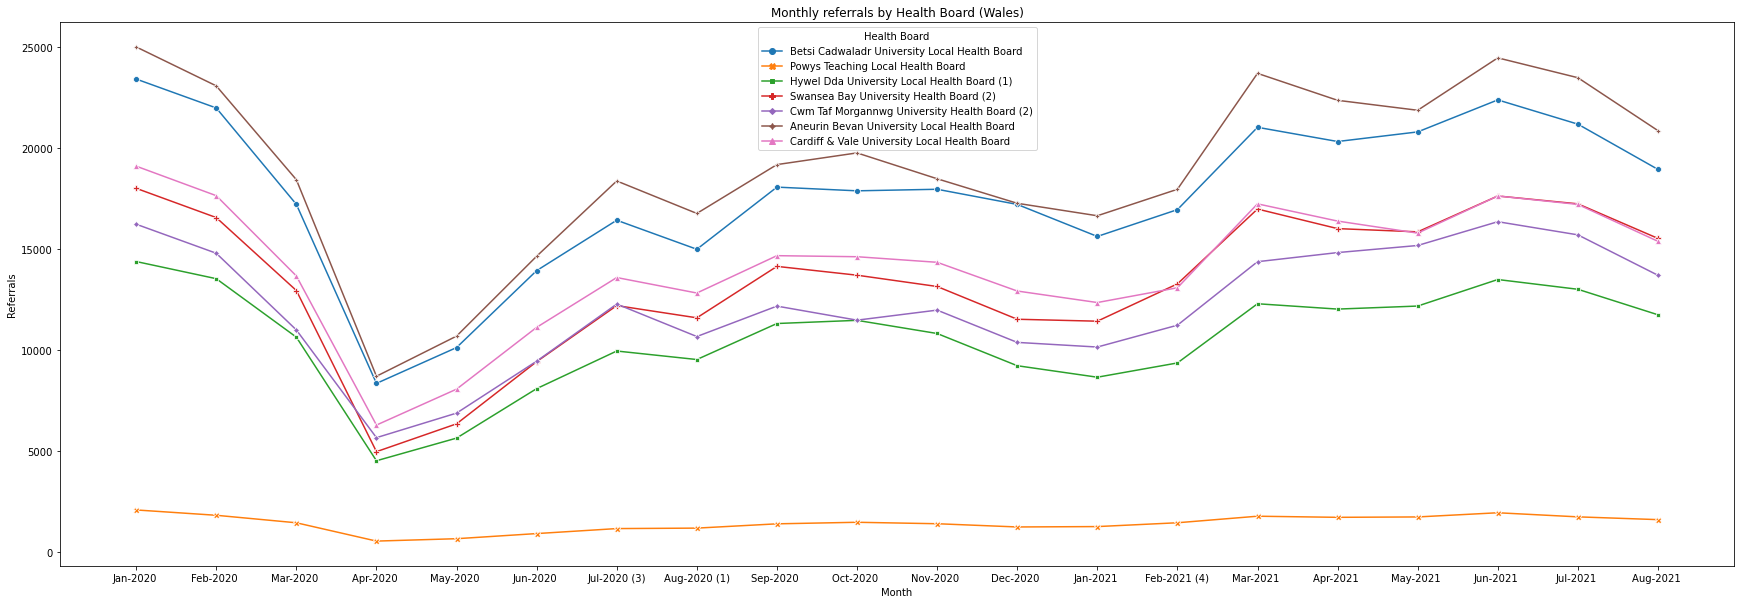

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
plt.title('Monthly referrals by Health Board (Wales)') # There are many ways to customise plots in matplotlib: backgrounds, axes, ticks, tick markers, titles, legends, the list goes on and on.
ax = sns.lineplot(data=data_unpv, x='Month', y='Referrals', hue='Health Board', markers=True, style='Health Board', dashes=False)

## Conclusion

Thank you for attending this session! Hopefully it has given you plenty of ideas on how you can use Python for your own projects, whether it is annoying colleagues with automated emails or data analysis.

Keep an eye out for more Python tutorials in the future!